## Exercise 04 : Histogram

In [110]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [111]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [112]:
query = """
        select uid, timestamp from checker
        where uid like 'user_%';
        """

df = pd.read_sql(query, conn, parse_dates='timestamp')
df

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [113]:
df['hour'] = df['timestamp'].dt.hour
df['number_day'] = df['timestamp'].dt.dayofweek
df['type'] = df['number_day'].apply(lambda x: 'weekend' if x >= 5 else 'working days')
df

,uid,timestamp,hour,number_day,type
0,user_4,2020-04-17 05:19:02.744528,5,4,working days
1,user_4,2020-04-17 05:22:35.249331,5,4,working days
2,user_4,2020-04-17 05:22:45.549397,5,4,working days
3,user_4,2020-04-17 05:34:14.691200,5,4,working days
4,user_4,2020-04-17 05:34:24.422370,5,4,working days
...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,20,3,working days
3203,user_1,2020-05-21 20:22:41.785725,20,3,working days
3204,user_1,2020-05-21 20:22:41.877806,20,3,working days
3205,user_1,2020-05-21 20:37:00.129678,20,3,working days


In [114]:
weekend = df[df['type'] == 'weekend'].reset_index()
work = df[df['type'] == 'working days'].reset_index()

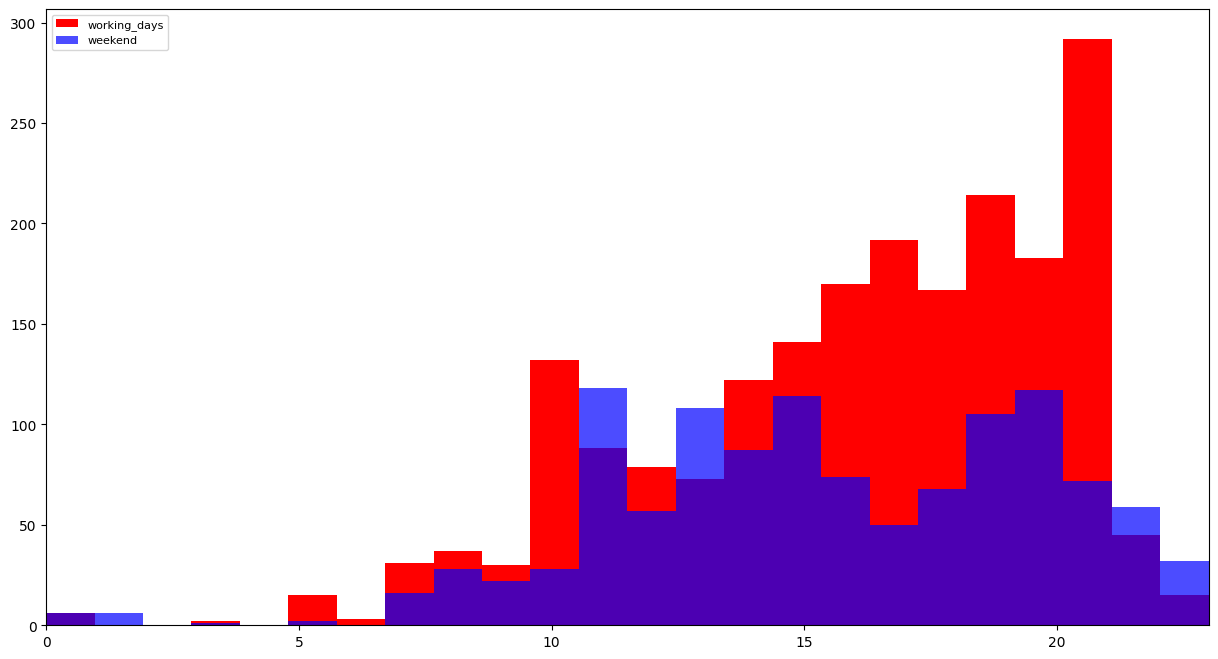

In [115]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(work['hour'], bins=24, color='red', label='working_days')
ax.hist(weekend['hour'], bins=24, color='blue', alpha=0.7, label='weekend')
ax.set_xlim(0, 23)
ax.legend(loc='upper left', fontsize='8')
plt.show()

## Are there hours when the total number of commits was higher on weekends than on working days?” In your answer, put the top-4 examples.

In [134]:
we = weekend.groupby('hour').count().reset_index()
wo = work.groupby('hour').count().reset_index()
answer = we[we['uid'] > wo['uid']]
answer = answer.rename(columns={'uid': 'count'})
answer[['hour', 'count']].sort_values('count', ascending=False).iloc[:4].set_index('hour')

,count
hour,
11,118
13,108
22,59
23,32
